In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kmader/colorectal-histology-mnist")

print("Path to dataset files:", path)

100%|██████████| 1.90G/1.90G [01:06<00:00, 30.5MB/s]

Extracting model files...


Path to dataset files: /Users/ryanhughes/.cache/kagglehub/datasets/kmader/colorectal-histology-mnist/versions/2


In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import skimage
import os
import pandas as pd

print("All libraries installed successfully!")


All libraries installed successfully!


In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
# Paths
data_dir = "Kather_texture_2016_image_tiles_5000"
classes = os.listdir(data_dir)  # Get class names

classes.remove(".DS_Store")

print(classes)

# Visualize some images
"""
for category in classes:
    folder = os.path.join(data_dir, category)
    for img_name in os.listdir(folder)[:3]:
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(category)
        plt.show()
"""
# Data Preprocessing
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))  # Resize if needed
    img = img / 255.0  # Normalize pixel values
    return img

X = []
y = []

for idx, category in enumerate(classes):
    folder = os.path.join(data_dir, category)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        X.append(preprocess_image(img_path))
        y.append(idx)

X = np.array(X)
y = np.array(y)

['02_STROMA', '06_MUCOSA', '05_DEBRIS', '01_TUMOR', '03_COMPLEX', '08_EMPTY', '04_LYMPHO', '07_ADIPOSE']
[[[[0.29411765 0.14509804 0.51764706]
   [0.25882353 0.14509804 0.48627451]
   [0.24705882 0.13333333 0.4745098 ]
   ...
   [0.49411765 0.34509804 0.71764706]
   [0.43137255 0.28235294 0.65490196]
   [0.43921569 0.2627451  0.63921569]]

  [[0.27058824 0.14117647 0.5254902 ]
   [0.23921569 0.09411765 0.40392157]
   [0.24705882 0.10196078 0.41176471]
   ...
   [0.45882353 0.30588235 0.66666667]
   [0.50980392 0.35686275 0.71764706]
   [0.50196078 0.32941176 0.69411765]]

  [[0.28235294 0.17254902 0.56862745]
   [0.29803922 0.1372549  0.43137255]
   [0.27843137 0.11764706 0.41176471]
   ...
   [0.41568627 0.2745098  0.62745098]
   [0.48235294 0.34117647 0.69411765]
   [0.39215686 0.24313725 0.61568627]]

  ...

  [[0.21568627 0.1372549  0.6       ]
   [0.22352941 0.09803922 0.52156863]
   [0.29803922 0.17254902 0.59607843]
   ...
   [0.25490196 0.13333333 0.55686275]
   [0.2627451  0.1

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=len(classes))
y_test = to_categorical(y_test, num_classes=len(classes))

In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=10)


Epoch 1/10


2024-12-03 20:54:15.730513: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


125/125 [==============================] - 15s 116ms/step - loss: 1.8496 - accuracy: 0.3537 - val_loss: 1.0310 - val_accuracy: 0.5900
Epoch 2/10
125/125 [==============================] - 15s 119ms/step - loss: 1.1700 - accuracy: 0.4952 - val_loss: 0.9029 - val_accuracy: 0.6940
Epoch 3/10
125/125 [==============================] - 15s 118ms/step - loss: 1.0787 - accuracy: 0.5408 - val_loss: 1.0092 - val_accuracy: 0.5860
Epoch 4/10
125/125 [==============================] - 15s 118ms/step - loss: 1.0103 - accuracy: 0.5560 - val_loss: 0.8327 - val_accuracy: 0.6600
Epoch 5/10
125/125 [==============================] - 15s 116ms/step - loss: 0.9679 - accuracy: 0.5815 - val_loss: 0.8115 - val_accuracy: 0.6540
Epoch 6/10
125/125 [==============================] - 15s 117ms/step - loss: 0.9454 - accuracy: 0.5853 - val_loss: 0.7445 - val_accuracy: 0.7120
Epoch 7/10
125/125 [==============================] - 15s 118ms/step - loss: 0.9459 - accuracy: 0.6047 - val_loss: 0.7963 - val_accuracy: 0.6

32/32 [==============================] - 1s 30ms/step
              precision    recall  f1-score   support

   02_STROMA       0.67      0.30      0.41       141
   06_MUCOSA       0.91      0.77      0.83       129
   05_DEBRIS       0.53      0.91      0.67       118
    01_TUMOR       0.86      0.90      0.88       112
  03_COMPLEX       0.80      0.64      0.71       126
    08_EMPTY       0.62      1.00      0.77       129
   04_LYMPHO       0.76      0.96      0.85       115
  07_ADIPOSE       0.95      0.40      0.56       130

    accuracy                           0.72      1000
   macro avg       0.76      0.73      0.71      1000
weighted avg       0.76      0.72      0.70      1000



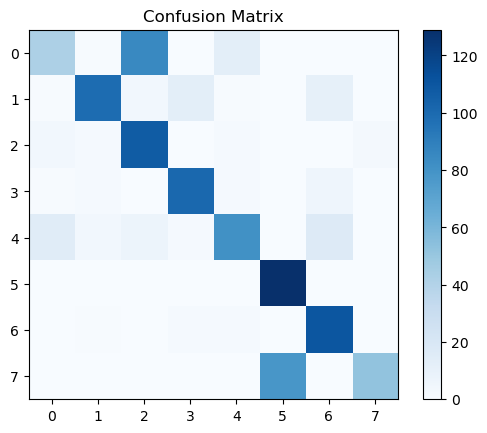

In [20]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred, target_names=classes))
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.show()


In [23]:
from skimage.feature import graycomatrix, graycoprops

In [24]:
this = True

this.astype(int)

AttributeError: 'bool' object has no attribute 'astype'